# Phân loại bệnh đái tháo đường (pima-indian)

## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
    + Bệnh đái tháo đường (tiểu đường) là một trong những bệnh mạn tính phổ biến và gây nhiều biến chứng nguy hiểm. Bộ dữ liệu Pima Indians Diabetes Database (PID) được sử dụng để xây dựng mô hình dự đoán khả năng mắc bệnh tiểu đường dựa trên các đặc điểm lâm sàng và nhân khẩu học.
+ **Dữ liệu vào**:
    + Pregnancies – số lần mang thai
    + Glucose – nồng độ glucose trong máu sau 2 giờ (mg/dL)
    + BloodPressure – huyết áp tâm trương (mm Hg)
    + SkinThickness – độ dày nếp gấp da (mm)
    + Insulin – nồng độ insulin trong huyết thanh (μU/ml)
    + BMI – chỉ số khối cơ thể (kg/m²)
    + DiabetesPedigreeFunction – chỉ số phả hệ (nguy cơ di truyền)
    + Age – tuổi bệnh nhân
+ **Kết quả**: 
    Outcome (biến nhị phân):
    0: Không mắc tiểu đường
    1: Mắc tiểu đường

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [279]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [280]:
# Load dataset
data_path  = r"C:\Users\ADMIN\Desktop\drive-download-20250928T111704Z-1-001\pima-indians-diabetes.data.csv"
data_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df_dataset = pd.read_csv(data_path, names = data_names)

## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [281]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:
+ Dữ liệu có 8 thuộc tính đầu vào để phân lớp:
+ Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
+ Các thuộc tính có đơn vị đo khác nhau (không đồng nhất):
+ Ví dụ: Glucose (mg/dL), BloodPressure (mm Hg), BMI (kg/m²), Age (năm), …
+ Tổng số dòng dữ liệu là 768 mẫu
+ Dữ liệu để phân lớp nằm ở cột Outcome (giá trị nhị phân: 0 = không mắc bệnh, 1 = mắc bệnh)

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [282]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
    s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
    display.display(df_dataset.query(s_query1))
    display.display(df_dataset.query(s_query2))
    display.display(df_dataset[df_dataset.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét**:
+ Dữ liệu không có giá trị rỗng (NaN, Null)
+ không bị trùng nhưng vẫn thấy có 0 

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [283]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Nhận xét**:
+ Bộ dữ liệu có 768 mẫu, không bị thiếu giá trị (non-null = 768 cho tất cả cột).
+ Một số thuộc tính có giá trị 0 bất thường:
+ Glucose, BloodPressure, SkinThickness, Insulin, BMI → về mặt y học không thể bằng 0, đây có thể coi là giá trị thiếu (missing values).
+ Thuộc tính Insulin có độ lệch chuẩn lớn (σ ≈ 115), giá trị max lên tới 846, cho thấy dữ liệu có nhiều ngoại lai (outliers).
+ Tuổi (Age) có min = 21 (đúng vì bộ dữ liệu chỉ gồm phụ nữ ≥ 21 tuổi), max = 81.
+ Biến mục tiêu Outcome có mean = 0.35 → tức là 34.9% bệnh nhân mắc tiểu đường, còn lại 65.1% không mắc → dữ liệu mất cân bằng nhẹ.

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [284]:
df_dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Nhận xét**:
+ Dữ liệu cần phân loại bị hoặc không bị tiểu đường 
+ Các lớp bị mất cân bằng
xử lý ở phần chuẩn bị dữ liệu

### xử lý dữ liệu mất cân bằng 
#### Tùy vào model và mục tiêu, bạn có mấy hướng:
##### Giữ nguyên
+ Với tỷ lệ 65–35 này, nhiều model (Logistic Regression, Random Forest, XGBoost, v.v.) vẫn train ổn.
+ Nhưng khi đánh giá, nên dùng Precision, Recall, F1-score thay vì Accuracy.
##### Cân bằng bằng kỹ thuật Resampling
+ Oversampling lớp thiểu số (Outcome=1) → dùng SMOTE hoặc RandomOversampler.
+ Undersampling lớp đa số (Outcome=0).
+ Kết hợp cả hai (SMOTEENN, SMOTETomek).

In [285]:
# Ví dụ với imblearn:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
print("Before:", pd.Series(y_train).value_counts())
print("After:", pd.Series(y_res).value_counts())
#Chỉ áp dụng trên dữ liệu huấn luyện, không áp dụng trên test set.
#SMOTE tạo dữ liệu tổng hợp, nên đôi khi có thể làm mô hình “học quá kỹ” nếu dữ liệu gốc quá ít.
#Sau SMOTE, bạn vẫn nên chuẩn hóa/scale dữ liệu nếu dùng mô hình nhạy với khoảng giá trị (Logistic Regression, SVM,…).

Before: 0.0    355
1.0    182
Name: count, dtype: int64
After: 1.0    355
0.0    355
Name: count, dtype: int64


##### Sử dụng class weights (nếu model hỗ trợ)
+ LogisticRegression, RandomForest, XGBoost… đều có class_weight hoặc scale_pos_weight.
+ Ví dụ LogisticRegression:
    model = LogisticRegression(class_weight="balanced", random_state=42)

### (5) Mối tương quan giữa các tính chất (Correlations)

Sự tương quan (correlation) thể hiện mối quan hệ giữa hai biến và cách chúng cùng thay đổi. Trong phân tích dữ liệu, hệ số tương quan phổ biến nhất là Pearson’s Correlation Coefficient, với công thức:
r = Σ[(xi – x̄)(yi – ȳ)] / √(Σ(xi – x̄)² Σ(yi – ȳ)²)
r = 1 : tương quan dương hoàn hảo
r = -1 : tương quan âm hoàn hảo
r = 0 : không có tương quan tuyến tính
Trong tập dữ liệu Pima Indians Diabetes:
Glucose có tương quan dương mạnh nhất với Outcome → nồng độ glucose là yếu tố dự đoán quan trọng nhất.
BMI và Age cũng có tương quan dương với Outcome, nghĩa là người có BMI cao và tuổi lớn thì nguy cơ mắc tiểu đường cao hơn.
Pregnancies có tương quan vừa phải với Outcome → số lần mang thai cũng góp phần vào nguy cơ.
Insulin và SkinThickness có mối tương quan khá cao với nhau, phản ánh mối quan hệ sinh lý giữa insulin và độ dày lớp mỡ dưới da.
BloodPressure có tương quan yếu với Outcome, nhưng vẫn có ý nghĩa y học.

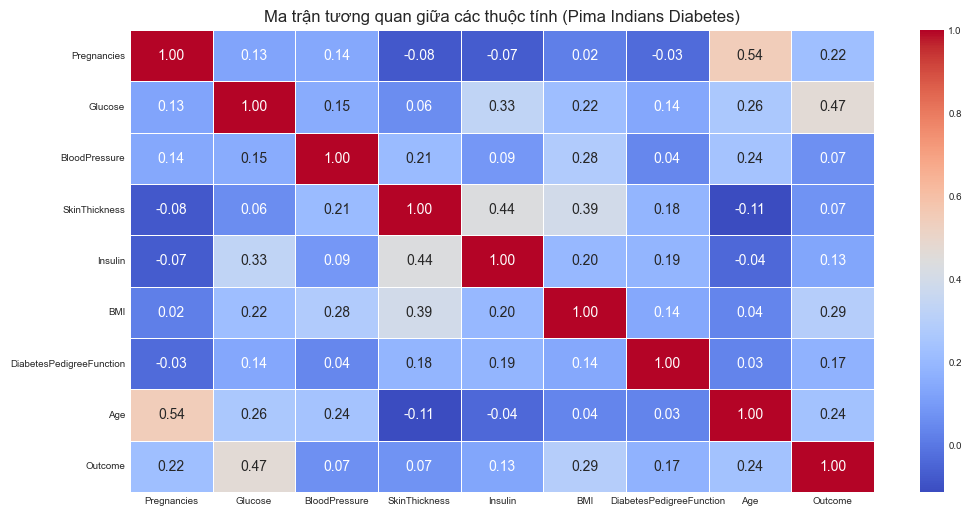

In [286]:
# Vẽ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa các thuộc tính (Pima Indians Diabetes)")
plt.show()

In [287]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:
Tương quan mạnh nhất giữa các biến độc lập:
SkinThickness – Insulin: 0.44
SkinThickness – BMI: 0.39
Age – Pregnancies: 0.54
→ Điều này cho thấy số lần mang thai tăng theo tuổi, và độ dày da có liên hệ khá chặt chẽ với mức insulin và BMI.
Biến liên quan nhiều nhất đến Outcome (bị tiểu đường):
Glucose – Outcome: 0.47 (tương quan cao nhất, dương)
BMI – Outcome: 0.29
Age – Outcome: 0.24
Pregnancies – Outcome: 0.22
→ Nồng độ đường huyết (Glucose) là yếu tố quan trọng nhất ảnh hưởng đến khả năng mắc bệnh tiểu đường, tiếp theo là BMI, tuổi và số lần mang thai.
Các cặp có tương quan yếu:
BloodPressure với hầu hết biến khác (0.06 – 0.28).
DiabetesPedigreeFunction hầu hết < 0.20 với các biến khác, ngoại trừ Outcome (0.17).
→ Nghĩa là huyết áp và yếu tố di truyền có ảnh hưởng, nhưng không nổi bật bằng Glucose hay BMI.
Tổng quan:
Glucose, BMI, tuổi và số lần mang thai có vai trò quan trọng nhất trong dự đoán tiểu đường.
Các biến Insulin, SkinThickness và DiabetesPedigreeFunction cũng góp phần nhưng mức độ thấp hơn.
BloodPressure ít đóng góp nhất.

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

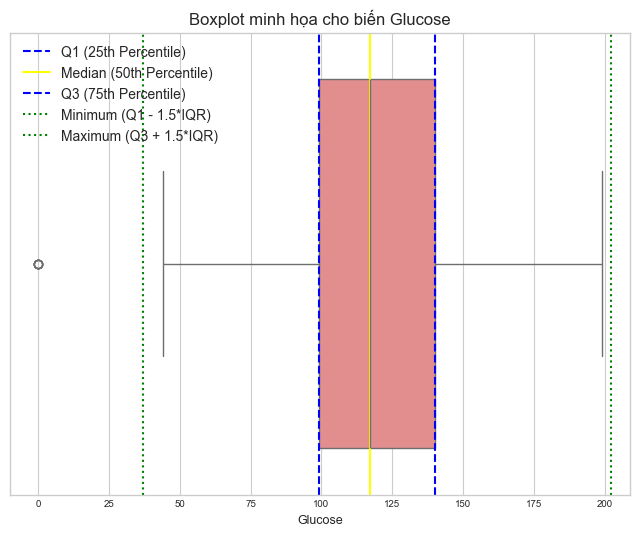

In [288]:
col = "Glucose"
data = df_dataset[col]

plt.figure(figsize=(8, 6))
sns.boxplot(x=data, color="lightcoral")

# Tính toán các giá trị thống kê
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
median = np.median(data)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Vẽ đường chú thích
plt.axvline(Q1, color="blue", linestyle="--", label="Q1 (25th Percentile)")
plt.axvline(median, color="yellow", linestyle="-", label="Median (50th Percentile)")
plt.axvline(Q3, color="blue", linestyle="--", label="Q3 (75th Percentile)")
plt.axvline(lower_bound, color="green", linestyle=":", label="Minimum (Q1 - 1.5*IQR)")
plt.axvline(upper_bound, color="green", linestyle=":", label="Maximum (Q3 + 1.5*IQR)")

plt.title(f"Boxplot minh họa cho biến {col}")
plt.legend()
plt.show()

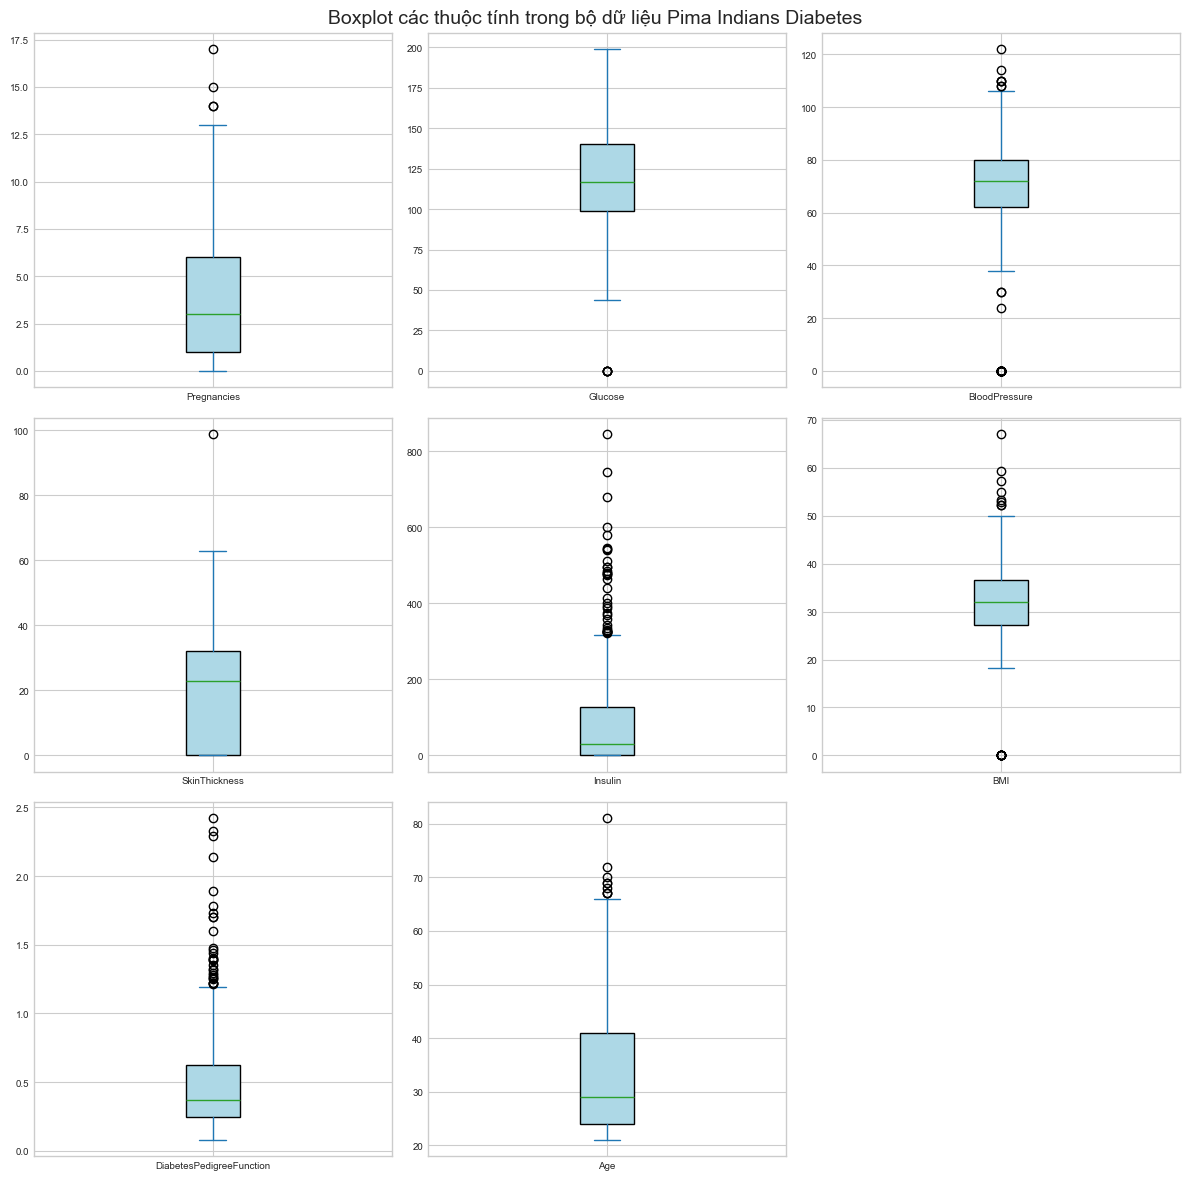

<Figure size 1200x600 with 0 Axes>

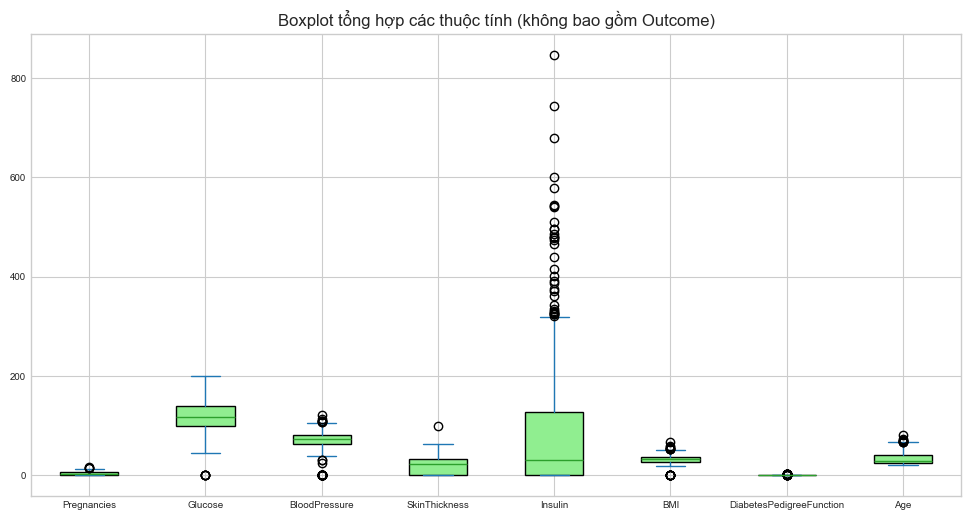

In [289]:
df_dataset.drop("Outcome", axis=1).plot(
    kind="box", 
    subplots=True, 
    layout=(3, 3),   # 8 biến => bố trí 3x3
    sharex=False, 
    sharey=False, 
    figsize=(12, 12),
    patch_artist=True, 
    boxprops=dict(facecolor="lightblue")
)

plt.suptitle("Boxplot các thuộc tính trong bộ dữ liệu Pima Indians Diabetes", fontsize=14)
plt.tight_layout()
plt.show()

# Vẽ boxplot tổng hợp
plt.figure(figsize=(12, 6))
df_dataset.drop("Outcome", axis=1).plot(
    kind="box", 
    figsize=(12, 6), 
    patch_artist=True, 
    boxprops=dict(facecolor="lightgreen")
)
plt.title("Boxplot tổng hợp các thuộc tính (không bao gồm Outcome)")
plt.show()

**Nhận xét**:
    + Glucose, BMI, BloodPressure: phân bố khá tập trung, có một số ngoại lai (outliers). Glucose có xu hướng lệch phải.
    + Insulin, SkinThickness: xuất hiện rất nhiều giá trị ngoại lai lớn, dữ liệu phân tán rộng → cần xử lý (log transform hoặc loại bỏ outliers).
    + Pregnancies, Age: phân bố hợp lý nhưng vẫn có một số ngoại lai.
    + DiabetesPedigreeFunction: đa số tập trung gần 0, có vài ngoại lai cao.
    Nhìn chung:
    + Insulin và SkinThickness chứa nhiều giá trị bất thường.
    + Glucose là biến quan trọng, phân bố hơi lệch phải.
    + Các biến khác phân bố khá ổn nhưng vẫn có vài ngoại lai.


**Biểu đồ Histogram**

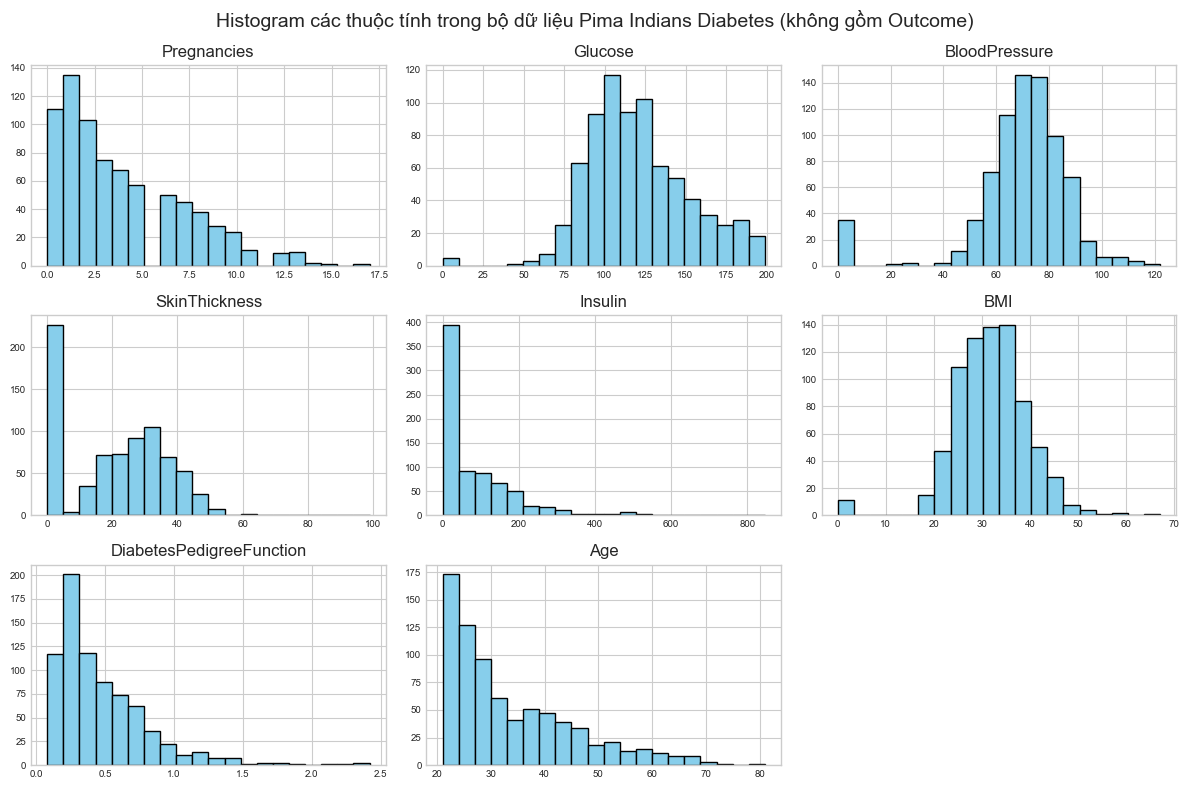

In [290]:
df_dataset.drop(columns=["Outcome"]).hist(
    figsize=(12, 8), bins=20, sharex=False, sharey=False, color="skyblue", edgecolor="black"
)

plt.suptitle("Histogram các thuộc tính trong bộ dữ liệu Pima Indians Diabetes (không gồm Outcome)", fontsize=14)
plt.tight_layout()
plt.show()

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

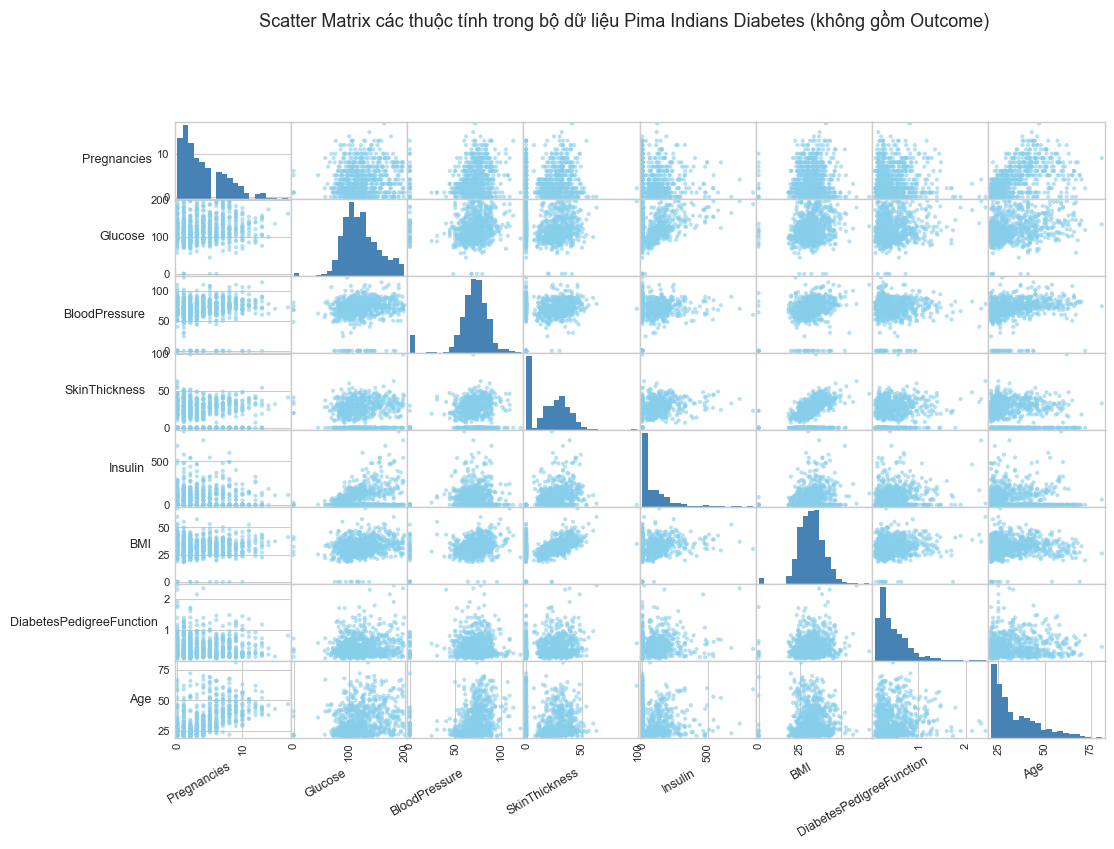

In [291]:

# Reset font và style
plt.style.use("seaborn-v0_8-whitegrid")

# Giảm kích thước chữ
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.rcParams["axes.labelsize"] = 9

# Vẽ scatter matrix
axes = pd.plotting.scatter_matrix(
    df_dataset.drop(columns=["Outcome"]),
    figsize=(12, 8),
    diagonal="hist",
    color="skyblue",
    alpha=0.6,
    hist_kwds={"bins": 20, "color": "steelblue"}
)

# Xoay nhãn trục X cho dễ đọc
for ax in axes[-1, :]:
    ax.set_xlabel(ax.get_xlabel(), rotation=30, ha="right")

for ax in axes[:, 0]:
    ax.set_ylabel(ax.get_ylabel(), rotation=0, ha="right", va="center")

plt.suptitle(
    "Scatter Matrix các thuộc tính trong bộ dữ liệu Pima Indians Diabetes (không gồm Outcome)",
    fontsize=13,
    y=1.02
)
plt.show()

+ Các cặp tính chất có độ tương đồng cao:
    + (SkinThickness, BMI) ≈ 0.65
    + (Age, Pregnancies) ≈ 0.54
    + (Insulin, Glucose) ≈ 0.33
    + (BMI, Insulin) ≈ 0.29

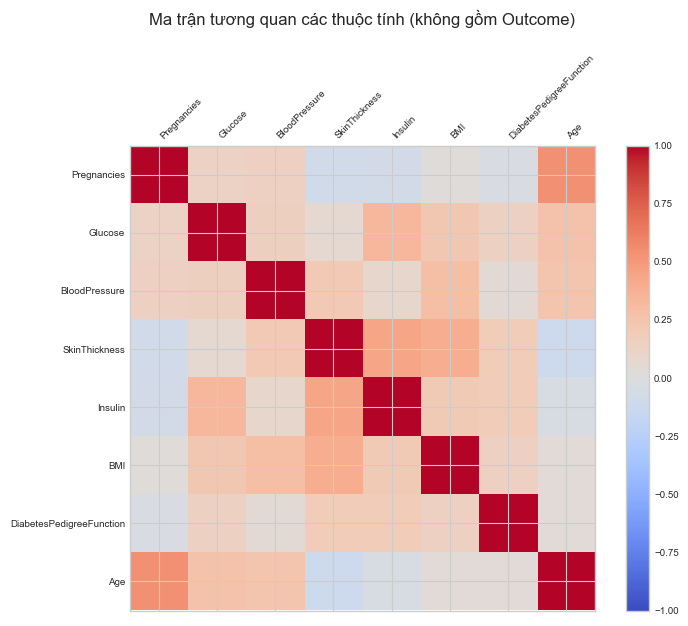

In [292]:
correlations = df_dataset.drop(columns=["Outcome"]).corr()

# Vẽ heatmap bằng matshow
plt.figure(figsize=(8, 6))
plt.matshow(correlations, vmin=-1, vmax=1, cmap="coolwarm", fignum=1)
plt.colorbar()

# Tạo ticks cho đủ 8 thuộc tính
plt.xticks(np.arange(len(correlations.columns)), correlations.columns, rotation=45, ha="left")
plt.yticks(np.arange(len(correlations.columns)), correlations.columns)

plt.title("Ma trận tương quan các thuộc tính (không gồm Outcome)", pad=20)
plt.show()

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [293]:
df_clean = df_dataset.copy()

#### (2) **Xóa dữ liệu trùng nhau** (không cần vì không trùng)

In [294]:
df_clean.drop_duplicates(ignore_index=True, inplace=True)
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [295]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


##### Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:
+ Chúng ta xóa bỏ cột tính chất vi phạm: 

```python
df_clean.drop("cột_vi_phạm", axis=1)
```
+ Chúng ta xóa bỏ các dòng vi phạm: 

```python
df_clean.dropna(subset=["cột_vi_phạm", ...])
```

+ Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:

```python
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)
```

In [296]:
# Example:
df_example = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\drive-download-20250928T111704Z-1-001\\Data.csv")
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [297]:
# Chúng ta xóa bỏ cột tính chất vi phạm
df_example.drop("Salary", axis = 1)

,Country,Age,Purchased
0,France,44.0,No
1,Spain,27.0,Yes
2,Germany,30.0,No
3,Spain,38.0,No
4,Germany,40.0,Yes
5,France,35.0,Yes
6,Spain,NaN,No
7,France,48.0,Yes
8,Germany,50.0,No
9,France,37.0,Yes


In [298]:
# Chúng ta xóa bỏ các dòng vi phạm
df_example.dropna(subset=["Salary", "Age"])

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [299]:
# Điền giá trị hằng số (cho cột Age) hoặc median (cho cột Salary)
df_example["Age"].fillna(0, inplace=True)
median = df_example["Salary"].median()
df_example["Salary"].fillna(median, inplace=True)
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,0.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [300]:
# 1. Kiểu dữ liệu
print("=== Kiểu dữ liệu từng cột ===")
print(df_dataset.dtypes)
print("\n")

# 2. Kiểm tra giá trị Null
print("=== Số lượng giá trị Null từng cột ===")
print(df_dataset.isnull().sum())
print("\n")



=== Kiểu dữ liệu từng cột ===
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


=== Số lượng giá trị Null từng cột ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64




In [301]:
print("=== Số lượng giá trị bằng 0 (có thể là missing) ===")
for col in df_dataset.columns:
    print(f"{col}: {(df_dataset[col] == 0).sum()}")
print("\n")


=== Số lượng giá trị bằng 0 (có thể là missing) ===
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500




xử lý giá trị 0

In [302]:
for col in df_dataset.columns:
    df_dataset[col].replace(0, df_dataset[col].median(), inplace=True)


In [303]:

print("=== Số lượng giá trị bằng 0 (có thể là missing) ===")
for col in df_dataset.columns:
    print(f"{col}: {(df_dataset[col]==0).sum()}")
print("\n")
#outcome thì không sao

=== Số lượng giá trị bằng 0 (có thể là missing) ===
Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500




xử lý ngoại lai

In [304]:
# 4. Kiểm tra ngoại lai bằng IQR
print("=== Ngoại lai theo IQR ===")
for col in df_dataset.columns:
    if df_dataset[col].dtype in ['int64','float64'] and col != 'Outcome':
        Q1 = df_dataset[col].quantile(0.25)
        Q3 = df_dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        outliers_count = ((df_dataset[col] < lower) | (df_dataset[col] > upper)).sum()
        print(f"Cột '{col}': {outliers_count} giá trị ngoại lai")

=== Ngoại lai theo IQR ===
Cột 'Pregnancies': 14 giá trị ngoại lai
Cột 'Glucose': 0 giá trị ngoại lai
Cột 'BloodPressure': 14 giá trị ngoại lai
Cột 'SkinThickness': 35 giá trị ngoại lai
Cột 'Insulin': 49 giá trị ngoại lai
Cột 'BMI': 8 giá trị ngoại lai
Cột 'DiabetesPedigreeFunction': 29 giá trị ngoại lai
Cột 'Age': 9 giá trị ngoại lai


In [305]:
# Danh sách cột số (bỏ cột Outcome vì là target)
numeric_cols = [col for col in df_dataset.columns if df_dataset[col].dtype in ['int64','float64'] and col != 'Outcome']

for col in numeric_cols:
    Q1 = df_dataset[col].quantile(0.25)
    Q3 = df_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    # Tìm các chỉ số ngoại lai
    outliers_idx = df_dataset[(df_dataset[col] < lower) | (df_dataset[col] > upper)].index
    
    # Thay ngoại lai bằng median của cột
    median_value = df_dataset[col].median()
    df_dataset.loc[outliers_idx, col] = median_value

# Kiểm tra lại số ngoại lai
for col in numeric_cols:
    Q1 = df_dataset[col].quantile(0.25)
    Q3 = df_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_count = ((df_dataset[col] < Q1 - 1.5*IQR) | (df_dataset[col] > Q3 + 1.5*IQR)).sum()
    print(f"Cột '{col}': {outliers_count} giá trị ngoại lai")


Cột 'Pregnancies': 0 giá trị ngoại lai
Cột 'Glucose': 0 giá trị ngoại lai
Cột 'BloodPressure': 0 giá trị ngoại lai
Cột 'SkinThickness': 16 giá trị ngoại lai
Cột 'Insulin': 23 giá trị ngoại lai
Cột 'BMI': 3 giá trị ngoại lai
Cột 'DiabetesPedigreeFunction': 15 giá trị ngoại lai
Cột 'Age': 7 giá trị ngoại lai


### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số (vì outcome đã là 0 và 1 cho nên không cần làm bước này)

##### Example

In [306]:
purchased_encoder = LabelEncoder()
purchased_encoder.fit(df_example["Purchased"])
purchased_names = purchased_encoder.classes_
print(purchased_names)
print(purchased_encoder.transform(df_example["Purchased"]))

['No' 'Yes']
[0 1 0 0 1 1 0 1 0 1]


In [307]:
df_example["Purchased"] = purchased_encoder.transform(df_example["Purchased"])
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,61000.0,1
5,France,35.0,58000.0,1
6,Spain,0.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn. 

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.
##### Trong dataset Pima Indians Diabetes:
+ Tất cả các biến (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) đều là số thực hoặc số nguyên.
+ Biến mục tiêu Outcome cũng là 0/1 (nhị phân).
+ Không hề có biến dạng danh mục (categorical) như kiểu “Nam/Nữ”, “Có/Không” dạng chữ.

##### Example

In [308]:
# Áp dụng cho cột country
df_contry_onehot = pd.get_dummies(df_example["Country"])
df_contry_onehot

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False
5,True,False,False
6,False,False,True
7,True,False,False
8,False,True,False
9,True,False,False


In [309]:
df_contry_onehot = pd.DataFrame(df_contry_onehot.values, 
                                columns=["Is_France", "Is_Germany", "Is_Spain"])
df_contry_onehot

,Is_France,Is_Germany,Is_Spain
0,True,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False
5,True,False,False
6,False,False,True
7,True,False,False
8,False,True,False
9,True,False,False


In [310]:
df_example = df_example.drop("Country", axis = 1)
df_example = df_contry_onehot.join(df_example)
df_example

,Is_France,Is_Germany,Is_Spain,Age,Salary,Purchased
0,True,False,False,44.0,72000.0,0
1,False,False,True,27.0,48000.0,1
2,False,True,False,30.0,54000.0,0
3,False,False,True,38.0,61000.0,0
4,False,True,False,40.0,61000.0,1
5,True,False,False,35.0,58000.0,1
6,False,False,True,0.0,52000.0,0
7,True,False,False,48.0,79000.0,1
8,False,True,False,50.0,83000.0,0
9,True,False,False,37.0,67000.0,1


#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [311]:

# Các cột cần scale (loại bỏ Outcome)
scale_columns = [col for col in df_clean.columns if col != "Outcome"]

# Khởi tạo scaler
minmax_scaler = MinMaxScaler()

# Fit và transform dữ liệu
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.fit_transform(df_clean[scale_columns])

# Xem kết quả sau khi chuẩn hóa
print(df_clean_minmax.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  


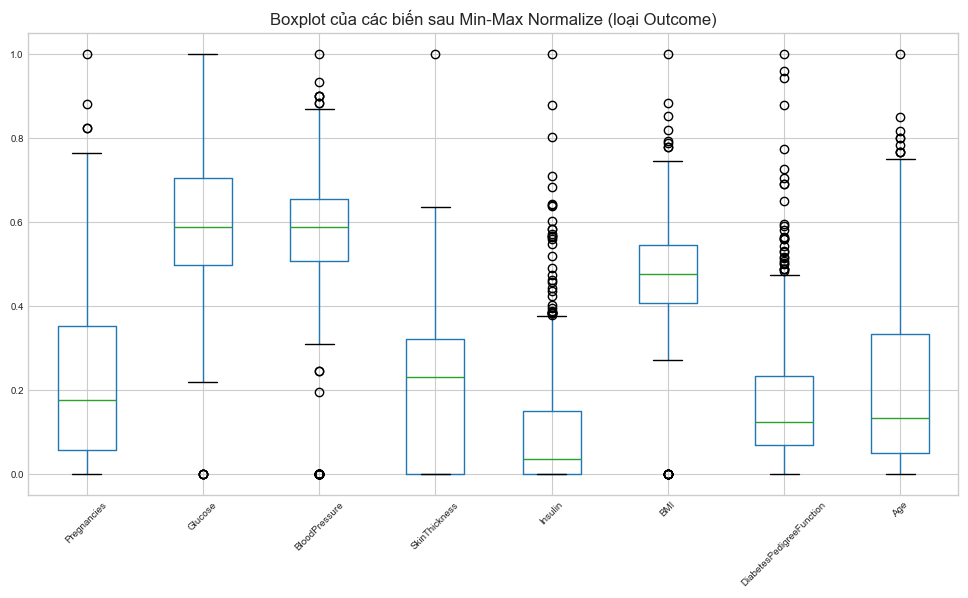

In [312]:
plt.figure(figsize=(12, 6))
df_clean_minmax.drop(columns=["Outcome"]).boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot của các biến sau Min-Max Normalize (loại Outcome)")
plt.show()

In [313]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


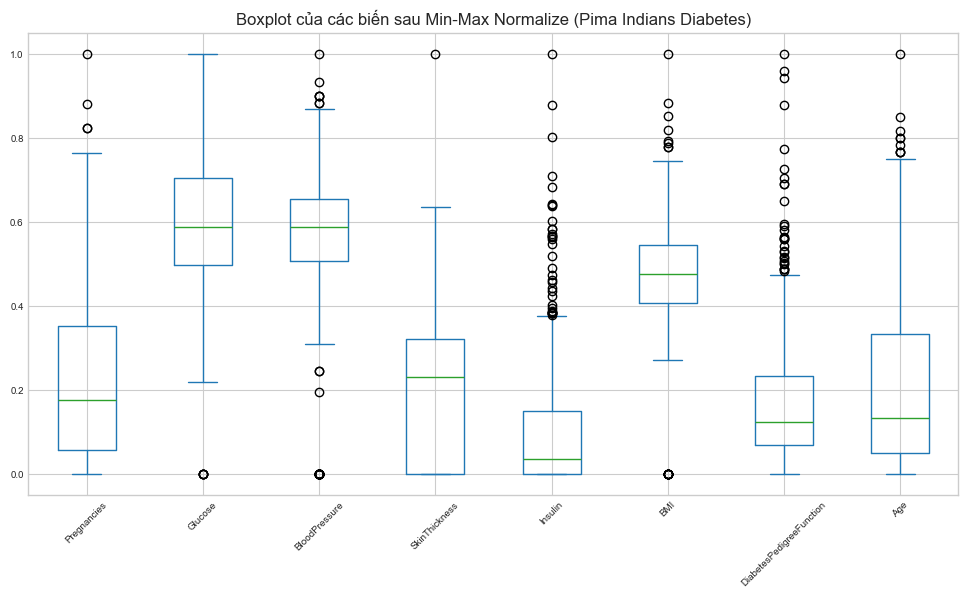

In [314]:
# Boxplot gọn cho bộ dữ liệu tiểu đường (chuẩn hóa hoặc normalize)
scale_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                 "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6))
plt.title("Boxplot của các biến sau Min-Max Normalize (Pima Indians Diabetes)")
plt.xticks(rotation=45)
plt.show()


In [315]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [316]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
np.set_printoptions(suppress=True, precision=2)
print(X_data[:20, :])
print(y_data[:20])

[[  6.   148.    72.    35.     0.    33.6    0.63  50.  ]
 [  1.    85.    66.    29.     0.    26.6    0.35  31.  ]
 [  8.   183.    64.     0.     0.    23.3    0.67  32.  ]
 [  1.    89.    66.    23.    94.    28.1    0.17  21.  ]
 [  0.   137.    40.    35.   168.    43.1    2.29  33.  ]
 [  5.   116.    74.     0.     0.    25.6    0.2   30.  ]
 [  3.    78.    50.    32.    88.    31.     0.25  26.  ]
 [ 10.   115.     0.     0.     0.    35.3    0.13  29.  ]
 [  2.   197.    70.    45.   543.    30.5    0.16  53.  ]
 [  8.   125.    96.     0.     0.     0.     0.23  54.  ]
 [  4.   110.    92.     0.     0.    37.6    0.19  30.  ]
 [ 10.   168.    74.     0.     0.    38.     0.54  34.  ]
 [ 10.   139.    80.     0.     0.    27.1    1.44  57.  ]
 [  1.   189.    60.    23.   846.    30.1    0.4   59.  ]
 [  5.   166.    72.    19.   175.    25.8    0.59  51.  ]
 [  7.   100.     0.     0.     0.    30.     0.48  32.  ]
 [  0.   118.    84.    47.   230.    45.8    0.55  31. 

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[  0.   126.    86.    27.   120.    27.4    0.52  21.  ]
 [  9.    89.    62.     0.     0.    22.5    0.14  33.  ]
 [  8.   125.    96.     0.     0.     0.     0.23  54.  ]
 [  6.   166.    74.     0.     0.    26.6    0.3   66.  ]
 [  1.   126.    60.     0.     0.    30.1    0.35  47.  ]]
Output = [0. 0. 1. 0. 1.]
+ Test: shape=(231, 8)
Input = 
[[  7.   160.    54.    32.   175.    30.5    0.59  39.  ]
 [  4.   189.   110.    31.     0.    28.5    0.68  37.  ]
 [  2.   107.    74.    30.   100.    33.6    0.4   23.  ]
 [  6.   194.    78.     0.     0.    23.5    0.13  59.  ]
 [  1.   118.    58.    36.    94.    33.3    0.26  23.  ]]
Output = [1. 0. 0. 1. 0.]


In [318]:
save_dir = "exps/diabetes"
if os.path.exists(save_dir) == False: 
    os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', 
         X_train=X_train, X_test=X_test, 
         y_train=y_train, y_test=y_test)

# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

# (Nếu có encoder thì lưu, còn nếu y_data đã là 0/1 thì bỏ đoạn này đi)
# joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

# Kiểm tra trong thư mục
print(os.listdir(save_dir))

# --- Kiểm tra phục hồi dữ liệu ---
# Load data.npz
data = np.load(f'{save_dir}/data.npz')
print("Keys trong data.npz:", data.keys())

# Load dataframe đã làm sạch
df_loaded = pd.read_excel(f'{save_dir}/df_clean.xlsx')
print("DataFrame đã load lại:\n", df_loaded.head())

# Nếu có encoder (trường hợp khác)
# encoder_loaded = joblib.load(f'{save_dir}/class_encoder.joblib')
# print("Classes:", encoder_loaded.classes_)

['data.npz', 'df_clean.xlsx']
Keys trong data.npz: KeysView(NpzFile 'exps/diabetes/data.npz' with keys: X_train, X_test, y_train, y_test)
DataFrame đã load lại:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Kết thúc